<a href="https://colab.research.google.com/github/satty0104/machine-learning/blob/main/ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf


In [ ]:
tf.__version__

'2.15.0'

In [ ]:
# prompt: import keras

import keras
print(keras.__version__)


2.15.0


In [ ]:
# prompt: check for gpu version

tf.config.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

a simple classifier using keras sequential api


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train.shape, x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
x_valid, x_train_full = x_train[: 5000]/255., x_train[5000:]/255.
y_valid, y_train_full = y_train[:5000], y_train[5000:]
x_test = x_test/255.

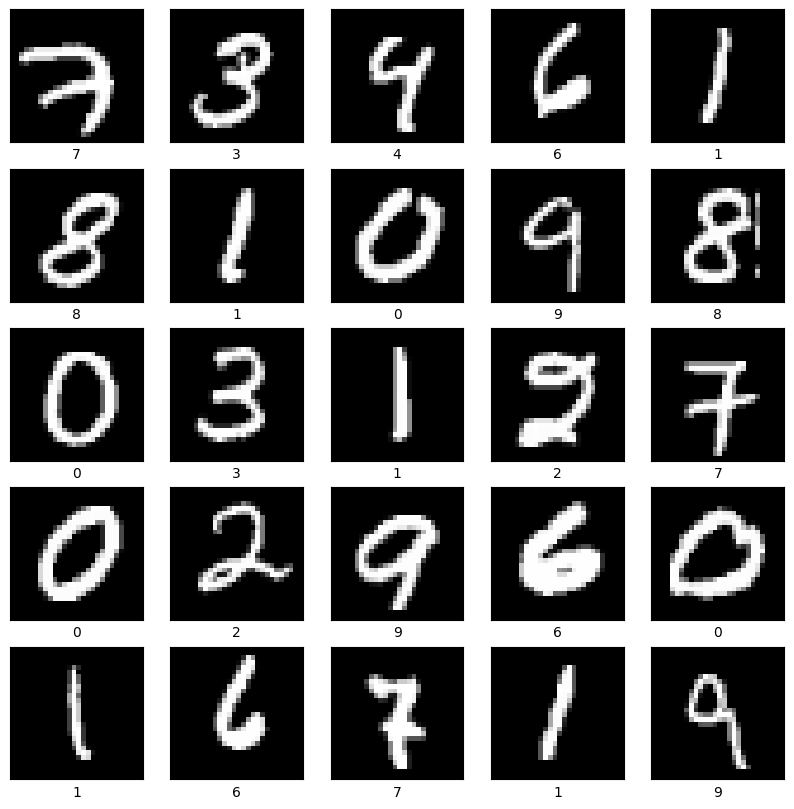

In [ ]:
# prompt: plot the x_train_full data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_full[i], cmap="gray")
    plt.xlabel(y_train_full[i])
plt.show()


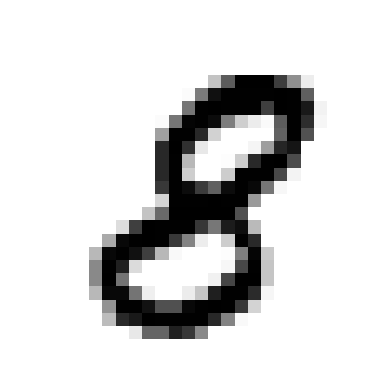

In [ ]:
plt.imshow(x_train_full[5], cmap="binary")
plt.axis("off")
plt.show()

<Axes: >

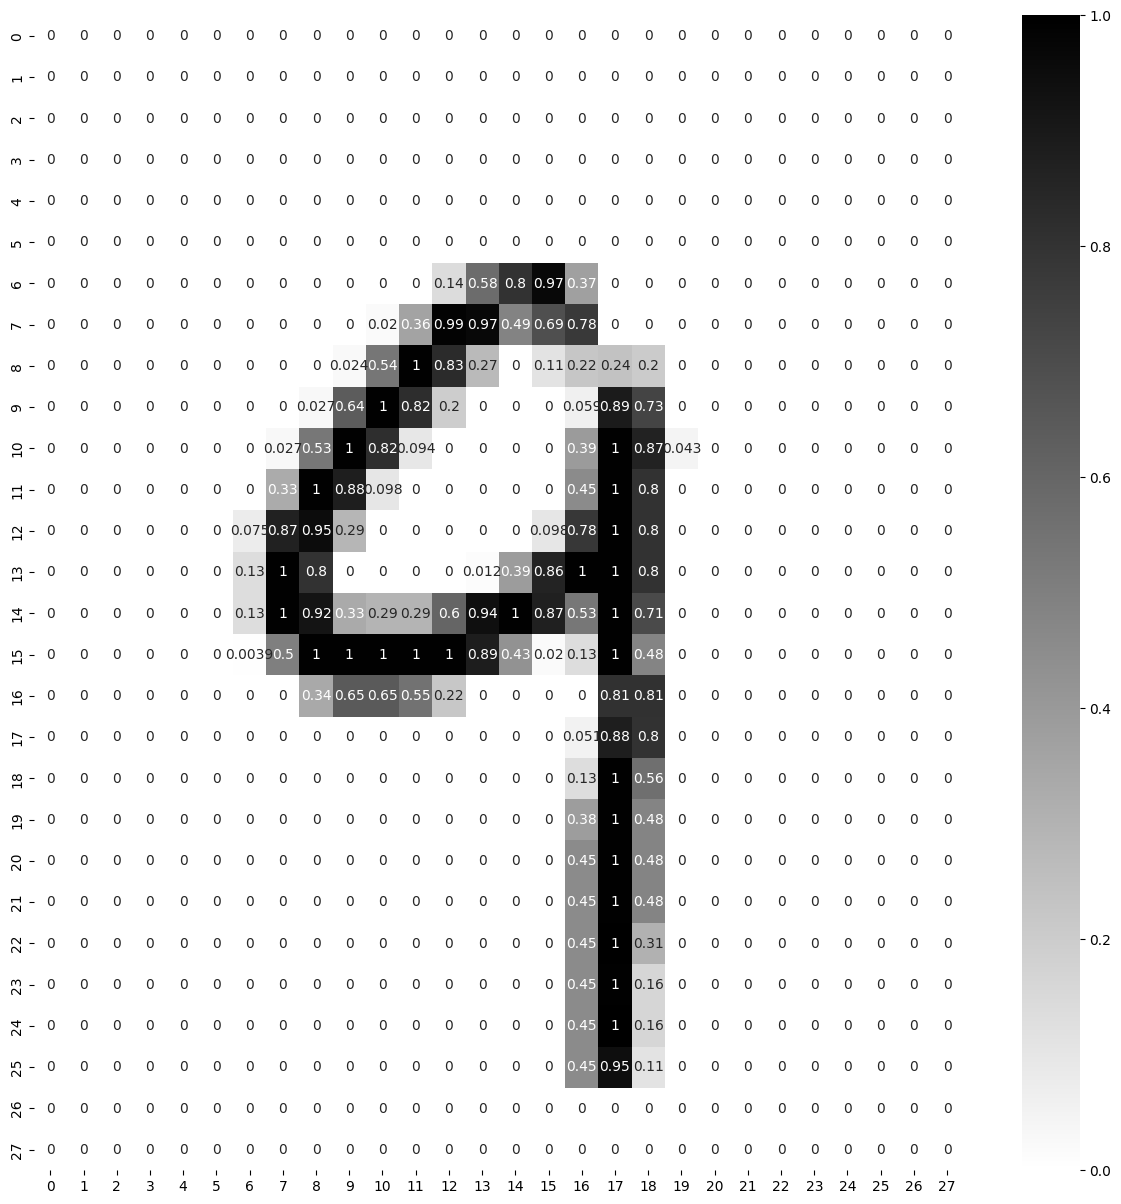

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(x_train_full[8], annot = True, cmap="binary")

In [ ]:
Layer = [
          tf.keras.layers.Flatten(input_shape=[28, 28], name = "inputlayer"),
          tf.keras.layers.Dense(300, activation="relu", name = "hiddenlayer1"),
          tf.keras.layers.Dense(100, activation="relu", name = "hiddenlayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name = "outputlayer")
]

model = tf.keras.models.Sequential(Layer)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name)

In [ ]:
hidden1.get_weights()

[array([[ 1.7980136e-02,  4.2220257e-02,  2.1041885e-02, ...,
          3.0656368e-02,  7.1059167e-02,  1.8176638e-02],
        [-7.1580522e-02,  8.6372867e-03, -4.9556885e-02, ...,
          1.4669448e-04,  3.7105709e-02,  1.1678427e-02],
        [ 4.4117868e-04,  8.7767839e-06,  3.8189210e-02, ...,
          2.2286303e-02,  5.9928373e-02, -8.2113147e-03],
        ...,
        [ 3.8865604e-02, -6.9734402e-02, -2.4510875e-02, ...,
          2.5145784e-02, -4.9218781e-02, -2.6551101e-02],
        [ 6.4933002e-02,  4.0182874e-02,  5.9972525e-02, ...,
         -4.5641109e-02,  7.3925376e-02,  3.0521043e-02],
        [ 5.8513194e-02,  4.3292530e-02,  3.4878850e-02, ...,
          6.6560060e-02, -6.2402144e-02,  5.4904670e-03]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.

In [ ]:
weights, baises = hidden1.get_weights()




In [ ]:
weights.shape

(784, 300)

In [ ]:
baises.shape

(300,)

In [ ]:
Loss_Function= "sparse_categorical_crossentropy"
Optimizer = "SGD"
Metrics=["accuracy"]

model.compile(loss = Loss_Function,
              optimizer = Optimizer,
              metrics=Metrics)


In [ ]:
Epochs = 30
Validation_set = (x_valid, y_valid)

history = model.fit(x_train_full, y_train_full, epochs = Epochs, validation_data= Validation_set)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.6123 - accuracy: 0.8421 - val_loss: 0.3143 - val_accuracy: 0.9124
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2879 - accuracy: 0.9173 - val_loss: 0.2445 - val_accuracy: 0.9332
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2357 - accuracy: 0.9330 - val_loss: 0.2044 - val_accuracy: 0.9438
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2015 - accuracy: 0.9423 - val_loss: 0.1824 - val_accuracy: 0.9484
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1764 - accuracy: 0.9497 - val_loss: 0.1629 - val_accuracy: 0.9556
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1567 - accuracy: 0.9550 - val_loss: 0.1490 - val_accuracy: 0.9602
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1406 - accuracy: 0.9598 - val_loss: 0.1364 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9772


[0.0703248381614685, 0.9771999716758728]

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model= tf.keras.models.load_model("model.h5")

In [ ]:
loaded_model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9772


[0.0703248381614685, 0.9771999716758728]

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.612303,0.842109,0.314315,0.9124
1,0.287912,0.917291,0.244458,0.9332
2,0.235698,0.933036,0.204390,0.9438
3,0.201503,0.942309,0.182369,0.9484
4,0.176409,0.949745,0.162878,0.9556
5,0.156670,0.955018,0.148981,0.9602
6,0.140584,0.959836,0.136427,0.9612
7,0.127258,0.963855,0.127841,0.9632
8,0.115646,0.967600,0.119158,0.9688
9,0.106457,0.969182,0.113753,0.9698


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['accuracy'].plot(kind='hist', bins=20, title='accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['val_loss'].plot(kind='hist', bins=20, title='val_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='loss', y='accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='accuracy', y='val_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='val_loss', y='val_accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['val_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('val_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['val_accuracy']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('val_accuracy')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['accuracy'].plot(kind='line', figsize=(8, 4), title='accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['val_loss'].plot(kind='line', figsize=(8, 4), title='val_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

<function matplotlib.pyplot.show(close=None, block=None)>

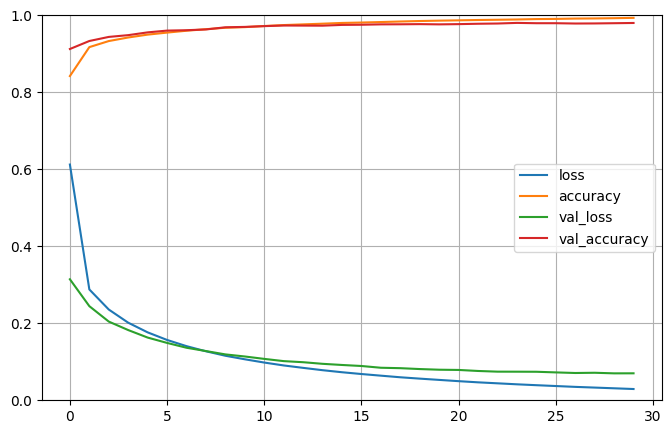

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

1/1 [==============================] - 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
y_pred= np.argmax(y_proba, axis=1)


array([7, 2, 1])

In [ ]:
import tensorflow as tf
tf.__version__
import keras
keras.__version__

'2.15.0'

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [ ]:
f_mnist = tf.keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = f_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train_full.shape, x_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [ ]:
y_train_full.shape, y_train_full.dtype

((60000,), dtype('uint8'))

In [ ]:
x_test.shape, x_test.dtype

((10000, 28, 28), dtype('uint8'))

In [ ]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [ ]:
x_valid, x_train = x_train_full[:5000]/255., x_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
x_test = x_test/255.

4

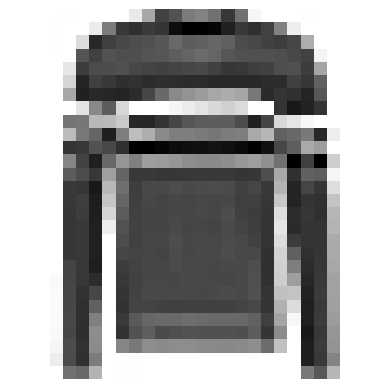

In [ ]:
plt.imshow(x_train_full[5], cmap="binary")
plt.axis("off")
plt.show
y_train[0]

<Axes: >

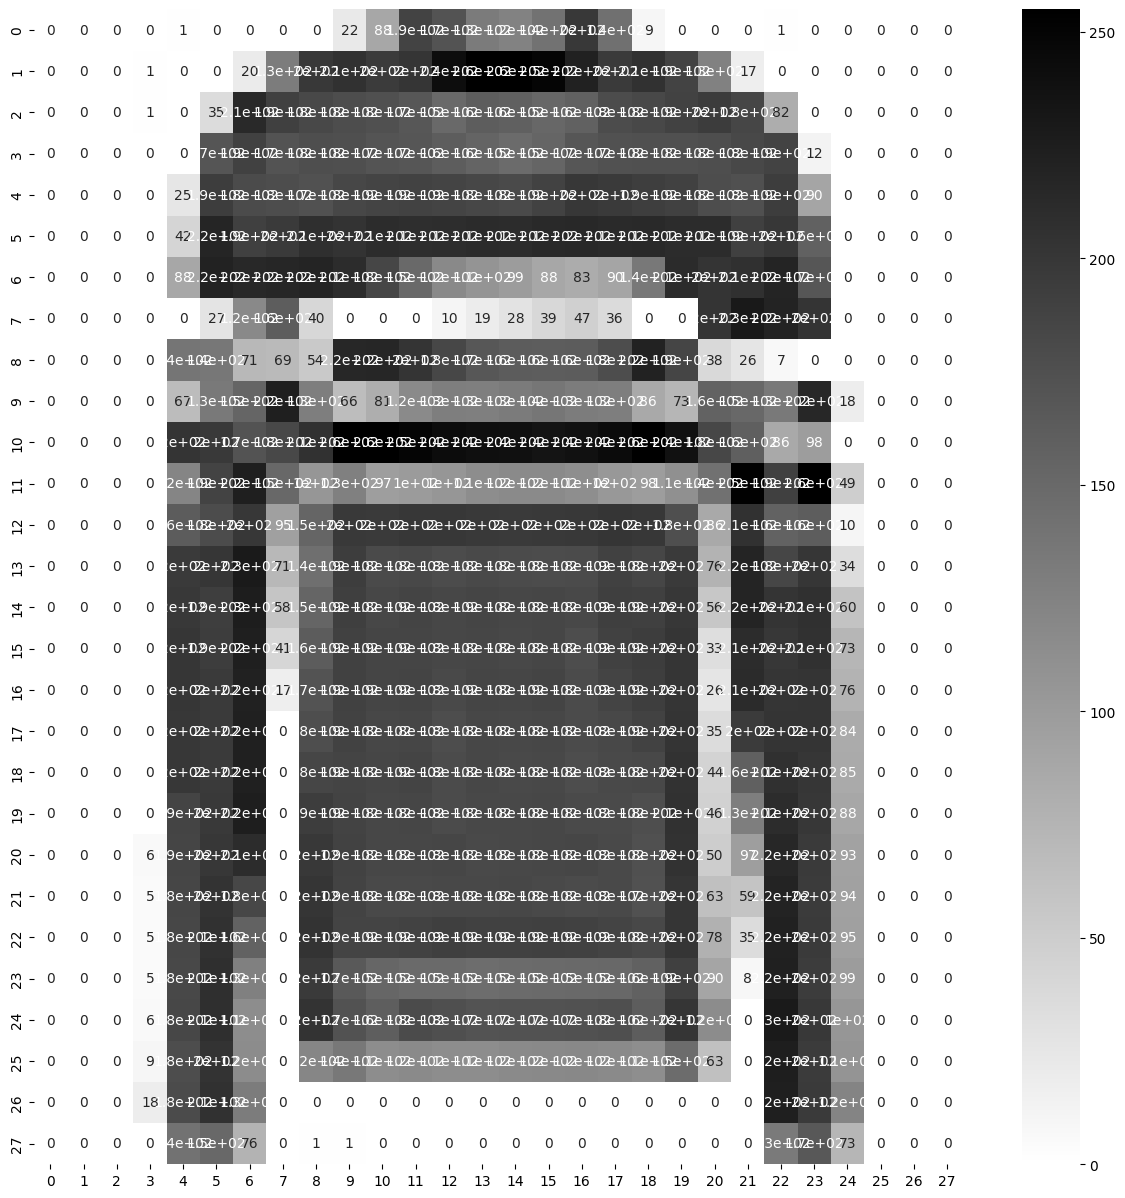

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 15))
sns.heatmap(x_train_full[5], annot = True, cmap="binary")

In [ ]:
Layers =[
          tf.keras.layers.Flatten(input_shape=[28, 28], name = "inputlayer"),
          tf.keras.layers.Dense(300, activation="relu", name = "hiddenlayer1"),
          tf.keras.layers.Dense(100, activation="relu", name = "hiddenlayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name = "outputlayer")
]

In [ ]:
model = tf.keras.models.Sequential(Layers)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name)

In [ ]:
hidden1.get_weights()

[array([[ 0.0682849 , -0.06678926, -0.0636679 , ..., -0.03581913,
         -0.0295386 , -0.00897729],
        [ 0.00874581,  0.0110225 ,  0.0548204 , ..., -0.06946632,
          0.06561048,  0.06679434],
        [ 0.05517389,  0.01974507,  0.02263164, ...,  0.01503357,
         -0.03463919,  0.04454502],
        ...,
        [-0.00409487,  0.01003858,  0.04759467, ..., -0.04632079,
         -0.06466357, -0.00344834],
        [-0.05772765,  0.01550308, -0.01847793, ...,  0.0582038 ,
          0.04853644,  0.04995377],
        [-0.00771262,  0.01722644, -0.03761702, ...,  0.04496519,
          0.06845348, -0.03968428]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
weights, baises = hidden1.get_weights()

In [ ]:
weights.shape

(784, 300)

In [ ]:
baises.shape

(300,)

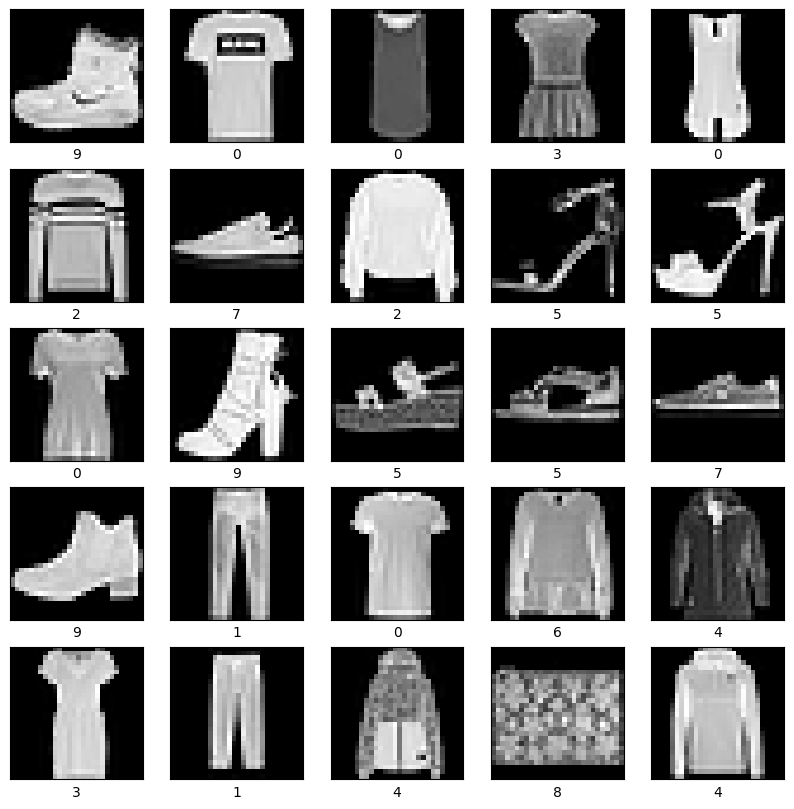

In [ ]:
# prompt: plot the x_train_full data

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_full[i], cmap="gray")
    plt.xlabel(y_train_full[i])
plt.show()


In [ ]:
Loss_Function= "sparse_categorical_crossentropy"
Optimizer = "SGD"
Metrics=["accuracy"]

model.compile(loss = Loss_Function,
              optimizer = Optimizer,
              metrics=Metrics)

In [ ]:
Epochs = 30
Validation_set = (x_valid, y_valid)

history = model.fit(x_train, y_train, epochs = Epochs, validation_data= Validation_set)

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7295 - accuracy: 0.7609 - val_loss: 0.5163 - val_accuracy: 0.8258
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4902 - accuracy: 0.8293 - val_loss: 0.4691 - val_accuracy: 0.8324
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4425 - accuracy: 0.8457 - val_loss: 0.4113 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4176 - accuracy: 0.8528 - val_loss: 0.4244 - val_accuracy: 0.8550
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3957 - accuracy: 0.8614 - val_loss: 0.4127 - val_accuracy: 0.8562
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3800 - accuracy: 0.8662 - val_loss: 0.3692 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3666 - accuracy: 0.8701 - val_loss: 0.4066 - val_accuracy:

In [ ]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8807


[0.33492693305015564, 0.8806999921798706]

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.729462,0.760855,0.516327,0.8258
1,0.490192,0.829327,0.469067,0.8324
2,0.442490,0.845691,0.411280,0.8590
3,0.417632,0.852818,0.424374,0.8550
4,0.395685,0.861382,0.412659,0.8562
5,0.380027,0.866218,0.369153,0.8708
6,0.366635,0.870073,0.406606,0.8582
7,0.354868,0.873345,0.356684,0.8730
8,0.344327,0.877400,0.359872,0.8758
9,0.335890,0.880236,0.346328,0.8806


<function matplotlib.pyplot.show(close=None, block=None)>

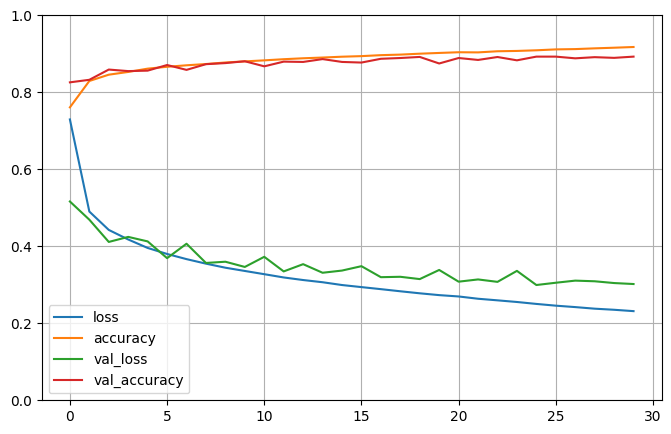

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

ap 1


In [ ]:
del model

In [ ]:
model


NameError: name 'model' is not defined

In [ ]:
Layers_bn_one =[
          tf.keras.layers.Flatten(input_shape=[28, 28], name = "inputlayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300, activation="relu", name = "hiddenlayer1"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100, activation="relu", name = "hiddenlayer2"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name = "outputlayer")
]

In [ ]:
model =tf.keras.models.Sequential(Layers_bn_one)

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [ ]:
bn_params = sum([784 * 4, 300 * 4, 100 * 4])

In [ ]:
traianable_bn_params = sum([784*4, 300*4, 100*4])/2 ## gama, beta

In [ ]:
Non_trainable_bn_params = bn_params - traianable_bn_params
Non_trainable_bn_params ## mean, std deviation

2368.0

bn approach 2


In [ ]:
# prompt: define Layers_bn_two where there are three layers like above activation function defined between batch normalisation and hidden layer acctivation function is relu for hidden layers

Layers_bn_two =[
          tf.keras.layers.Flatten(input_shape=[28, 28], name = "inputlayer"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(300,  name = "hiddenlayer1"),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(100,  name = "hiddenlayer2"),
          tf.keras.layers.Activation("relu"),
          tf.keras.layers.BatchNormalization(),
          tf.keras.layers.Dense(10, activation="softmax", name = "outputlayer")
]
